In [1]:
import pandas as pd
import numpy as np 
import scipy
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca.fit(df).transform(df)

print('Percentage of variance explained by the 1st Principal Component: %s'
      % str(pca.explained_variance_ratio_))


Percentage of variance explained by the 1st Principal Component: [ 0.92461621]


In [4]:
pca = decomposition.PCA(n_components=2)
X = pca.fit(df).transform(df)

print('Percentage of variance explained by the 1st/2nd Principal Component: %s'
      % str(pca.explained_variance_ratio_))

Percentage of variance explained by the 1st/2nd Principal Component: [ 0.92461621  0.05301557]


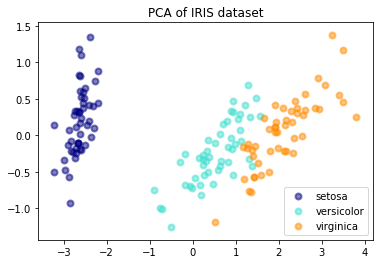

In [5]:
df['class'] = dataset.target_names[dataset.target]

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
target_names = dataset.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[dataset.target == i, 0], X[dataset.target == i, 1], color = color, alpha=.5, lw=2,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()